# Car Price Prediction

---

### Problem Statement

Build a linear regression model to predict prices of cars based on its technical specifications such as car manufacturer, its engine capacity, fuel efficiency, body-type etc.

**Dataset Description:**

The dataset contains 205 rows and 26 columns. Each column represents an attribute of a car as described in the table below.

|Sr No.|Attribute|Attribute Information|
|-|-|-|
|1|Car_ID|Unique id of each car (Interger)|
|2|Symboling|Assigned insurance risk rating; a value of +3 indicates that the car is risky; -3 suggests that it is probably a safe car (Categorical)|
|3|carCompany|Name of car company (Categorical)|
|4|fueltype| fuel-type i.e. petrol or diesel (Categorical)|
|5|aspiration|Aspiration used in a car (Categorical)|
|6|doornumber|Number of doors in a car (Categorical)|
|7|carbody|Body-type of a car (Categorical)|
|8|drivewheel|Type of drive wheel (Categorical)|
|9|enginelocation|Location of car engine (Categorical)|
|10|wheelbase|Weelbase of car (Numeric)|
|11|carlength|Length of car (Numeric)|
|12|carwidth|Width of car (Numeric)|
|13|carheight|Height of car (Numeric)|
|14|curbweight|The weight of a car without occupants or baggage (Numeric)|
|15|enginetype|Type of engine (Categorical)|
|16|cylindernumber|Number of cylinders placed in the car engine (Categorical)||17|enginesize|Capacity of an engine (Numeric)|
|18|fuelsystem|Fuel system of a car (Categorical)|
|19|boreratio|Bore ratio of car (Numeric)|
|20|stroke|Stroke or volume inside the engine (Numeric)|
|21|compressionratio|Compression ratio of an engine (Numeric)|
|22|horsepower|Power output of an engine (Numeric)|
|23|peakrpm|Peak revolutions per minute (Numeric)|
|24|citympg|Mileage in city (Numeric)|
|25|highwaympg|Mileage on highway (Numeric)|
|26|price(Dependent variable)|Price of a car (Numeric)|

This data set consists of three types of entities:

- the specification of an auto in terms of various characteristics,

- its assigned insurance risk rating,

- its normalised losses in use as compared to other cars.

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process **symboling**. A value of $+3$ indicates that the auto is risky, $-3$ that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality etc.), and represents the average loss per car per year.

**Note:** Several of the attributes in the database could be used as a "class" attribute.

**Dataset source:** https://archive.ics.uci.edu/ml/datasets/Automobile


The above dataset consists of data taken from 1985 Ward's Automotive Yearbook. Here's the list of original sources of the data:

1. 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.

2. Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038

3. Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037






---

#### Importing Modules & Reading Data

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/car-prices.csv

In [ ]:
# Import the modules, read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
cars_df = pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/car-prices.csv")
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Get the information on the dataset.
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There are 0 missing or null values in the dataset. Also, a lot of features have non-numeric values.

---

#### Data Cleaning

Extract the name of the manufacturer from the column `CarName`.

In [ ]:
# Display the first 25 rows of the 'CarName' column.
cars_df['CarName'].head(25)

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
20         chevrolet vega 2300
21               dodge rampage
22         dodge challenger se
23                  dodge d200
24           dodge monaco (sw)
Name: CarName, dtype: object

The name of a car follows the name of its manufacturer as illustrated below:

- `alfa-romero` is the manufacturer of `giulia, stelvio` etc cars,

- `audi` is the manufacturer of `100 ls, fox` etc cars,

- `bmw` is the manufacture of `x1, x3` etc cars

and so on.

In [ ]:
# Extract the name of the manufactures from the car names and display the first 25 cars to verify whether names are extracted successfully.
car_companies = pd.Series([car.split(" ")[0] for car in cars_df['CarName']], index = cars_df.index)
car_companies.head(25)

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
dtype: object

Add a new column to the `cars_df` DataFrame that stores the company names.

In [ ]:
# Create a new column named 'car_company'. It should store the company names of a the cars.
cars_df['car_company'] = car_companies
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
# Get the count of number of the cars sold be each manufacturer in the dataset.
cars_df['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

The following manufacturer names are misspelled or not regularised (follows the same case i.e. uppper case or lower case or title case):

- `vw` and `vokswagen` should be `volkswagen`,

- `porcshce` should be `porsche`,

- `toyouta` should be `toyota`,

- `Nissan` should be `nissan`,

- `maxda` should be `mazda`


In [ ]:
# Replace the misspelled 'car_company' names with their correct names.

# volkswagen
cars_df.loc[(cars_df['car_company'] == "vw") | (cars_df['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'

# porsche
cars_df.loc[cars_df['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars_df.loc[cars_df['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars_df.loc[cars_df['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars_df.loc[cars_df['car_company'] == "maxda", 'car_company'] = 'mazda'

In [ ]:
# Get the count of number of the cars sold be each manufacturer in the dataset again.
cars_df['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

Drop the `'CarName'` column as it is of no use.

In [ ]:
# Drop 'CarName' column from the 'cars_df' DataFrame.
cars_df.drop(columns= ['CarName'], axis = 1, inplace = True)

---

#### Data Preparation

Extract all the numeric features from the `cars_df` DataFrame.




In [ ]:
# Extract all the numeric (float and int type) columns from the dataset.
cars_numeric_df = cars_df.select_dtypes(include = ['int64', 'float64'])
cars_numeric_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Drop the 'car_ID' column from the 'cars_numeric_df' DataFrame.
cars_numeric_df.drop(columns = ['car_ID'], axis = 1, inplace = True)
cars_numeric_df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


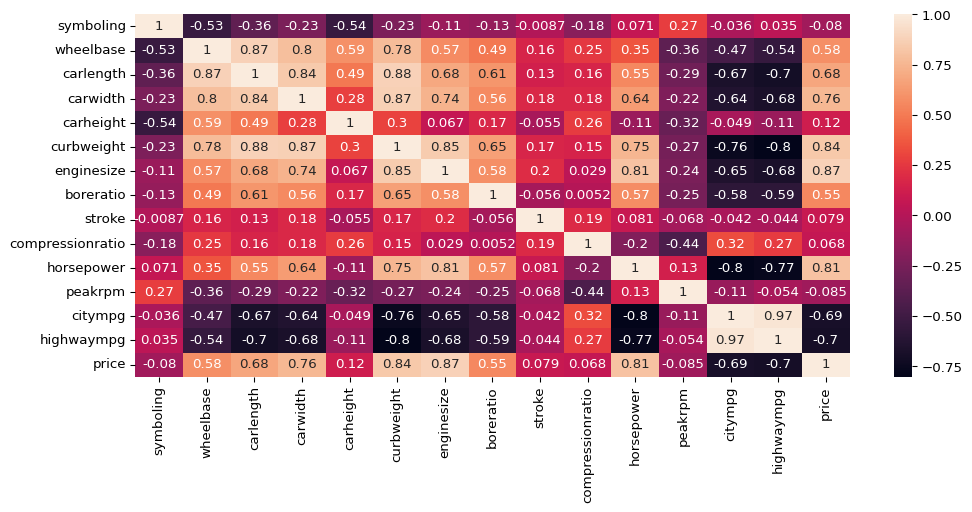

In [ ]:
# Draw a correlation heatmap between the numeric features.
plt.figure(figsize = (12, 5), dpi = 96)
sns.heatmap(cars_numeric_df.corr(), annot=True)
plt.show()

The heatmap shows some useful insights:

**Correlation of `price` with independent variables**

- `price` is highly and positively correlated with `wheelbase, carlength, carwidth, curbweight, enginesize`, `boreratio` and `horsepower`

- `price` is negatively correlated to `citympg` and `highwaympg` (`-0.70` approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower. These cars are designed to be affordable by the budget buyers who value more fuel efficiency mileage over powerful engine

**Correlation among independent variables**

- Many independent variables are highly correlated (top-left part of the heatmap) such as `wheelbase, carlength, curbweight, enginesize` etc. They are all measures of size and weight and are positively correlated


In [ ]:
# Get the first five rows of the 'doornumber' and 'cylindernumber' columns.
cars_df[['doornumber', 'cylindernumber']].head(5)

,doornumber,cylindernumber
0,two,four
1,two,four
2,two,six
3,four,four
4,four,five


Notice that the `doornumber` and `cylindernumber` columns are supposed to have numeric type values. But the numbers are reported in the words. So, you need to replace these words with the corresponding numbers.

In [ ]:
# Count the occurrence of each value in the 'cylindernumber' column.
cars_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [ ]:
# Count the occurrence of each value in the 'doornumber' column.
cars_df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

---

#### The `map()` Function

A map function is similar to a match the column exercise. You have a match one set of values with the other set of values.

Here you need to map:

- `one` to `1`

- `three` to `3`

- `four` to `4`

- `five` to `5`

- `six` to `6`

- `eight` to `8`

- `twelve` to `12`

To do the above replacement,

1. First, you need to create a dictionary in which the words are keys and their corresponding numeric representations are the values.

2. Apply the `map()` function. It takes the dictionary created in step one as an input.



In [ ]:
# Map the values of the 'doornumber' and 'cylindernumber' columns to their corresponding numeric values.
words_dict = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}
def num_map(series):
    return series.map(words_dict)

# Applying the function to the two columns
cars_df[['cylindernumber', 'doornumber']] = cars_df[['cylindernumber', 'doornumber']].apply(num_map, axis = 1)

In [ ]:
# Display the first five rows of the 'cylindernumber' and 'doornumber' columns. Also, check whether the data-types are integer or not.
print(cars_df[['cylindernumber', 'doornumber']].head())
print(cars_df[['cylindernumber', 'doornumber']].info())

   cylindernumber  doornumber
0               4           2
1               4           2
2               6           2
3               4           4
4               5           4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   cylindernumber  205 non-null    int64
 1   doornumber      205 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB
None


---

#### Activity 1: Feature Encoding

To build a linear regression, all the features need to have numeric values. However, a few features in this dataset, have non-numeric values. Their data-type is `object`. You need to obtain numeric values from these non-numeric values. This can be done by following the feature encoding steps.

Let's understand this concept with the help of an example. Let's consider the `carbody` column in the `cars_df` DataFrame.

In [ ]:
# S1.1: Get the counts of each of the values in the 'carbody' column.
cars_df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

For the `carbody` feature, there are five different types of values

- `sedan`

- `hatchback`

- `wagon`

- `hardtop`

- `convertible`

For each of the above values, you can add columns into your DataFrame such that each column has either `0` or `1` as its value. Eg., for the `sedan` value, you add a column named `sedan`. And if the car is a sedan, then the value in the `sedan` column will be `1` otherwise, it will be `0`. You can do this using the `get_dummies()` function of the Pandas module.

**Syntax:** `pandas.get_dummies(categorical_column, dtype = data_type)`

where

- `categorical_column` is the column having non-numeric categorical values

- `data_type` of the values in the newly added columns.


In [ ]:
# T1.1: Create dummy variables for the 'carbody' columns.
dummies_df = pd.get_dummies(cars_df['carbody'], dtype=int, drop_first=True)
dummies_df

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
200,0,0,1,0
201,0,0,1,0
202,0,0,1,0
203,0,0,1,0


As you can see, the output is a DataFrame containing five columns.

The first two cars (first two rows) are convertibles. Hence, the values in the `convertible` columns are `1` and in the other 4 columns are `0`. Similarly, the third car (third row) is a hatchback. Hence, the value in the `hatchback` column is `1` and in the other 4 columns are `0`.

These newly added columns are called **dummy variables (or columns)**. Let's check whether the data-types for these dummy columns is integer or not.



In [ ]:
# S1.2: Check whether the data-types for these dummy columns is integer or not.
dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   hardtop    205 non-null    int64
 1   hatchback  205 non-null    int64
 2   sedan      205 non-null    int64
 3   wagon      205 non-null    int64
dtypes: int64(4)
memory usage: 6.5 KB


In the above process, for each categorical value (i.e., `convertible,	hardtop, hatchback, sedan, wagon`) we added a new column. This process of obtaining numeric values from non-numeric categorical values is called **one-hot enconding**.

Here for 5 categorical values, we added 5 new dummy columns. In general, for $n$ categorical values in a column, we can add $n$ new dummy columns.

We can do the same thing with one less column i.e. for $n$ categorical values, we can add only $n - 1$ columns to convey the same information. To have a one column less, pass `drop_first = True` as another input to the `get_dummies()` function of the Pandas module.

In [ ]:
# S1.3: Create dummy variables for the 'carbody' columns with 1 column less.


In the above DataFrame having dummy variabes, we have 4 columns i.e. `hardtop, hatchback, sedan` and `wagon`.

For the first two cars (first two rows) the values in the other 4 columns are `0`. This means the car is convertible. Similarly, for the third car (third row) the value in the `hatchback` column is `1` and in the other 3 columns are `0`. This means the car is a hatchback.

This process of having one less dummy variable by encoding non-numeric categorical values to numeric values is called **dummy coding**. The naming convention is strange so just focus on the part that how  you can encode (or code) non-numeric categorical values into numeric values.

In the same, you can encode all the other columns having categorical values to get numeric values.

In [ ]:
# S1.4: Create a DataFrame containing all the non-numeric type features.
cat_df=cars_df.select_dtypes(include=['category', 'object'])
cat_df.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


For the above `object` or categorical columns, get the dummy variables using the **dummy coding** process.

In [ ]:
# S1.5: Get dummy variables for all the categorical type columns using the dummy coding process.
dummy_df=pd.get_dummies(cat_df, drop_first=True, dtype='int64')
dummy_df.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that we have dummy variables, we don't need the original non-numeric type columns in the `cars_df` DataFrame. So let's remove the original non-numeric type columns from the `cards_df` DataFrame and then concatenate it with the above DataFrame containing only numeric values for the non-numeric type columns.

In [ ]:
# S1.6: Drop the categorical type columns from the 'cars_df' DataFrame.
cars_df.drop(columns=cat_df.columns, inplace=True)

In [ ]:
cars_df.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Now, let's concatenate the `cars_df` and `cars_dummies_df` DataFrames

In [ ]:
# S1.7: Concatenate the 'cars_df' and 'cars_dummies_df' DataFrames.
df=pd.concat([cars_df, dummy_df], axis=1)
df.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,0,0,0,0,0,0,0,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,0,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,0,0,0


Let's drop the `car_ID` column from the `cars_df` DataFrame. We don't need it to build a linear regression model.

In [ ]:
# S1.8: Drop the 'car_ID' column
df.drop(columns='car_ID', inplace=True)
df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0


Let's verify whether all the columns have numeric values or not and also find out the number of columns we have after creating dummy variables.

In [ ]:
# S1.9: Get the data-types of all the columns and the number of rows and columns in the 'cars_df' DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   doornumber              205 non-null    int64  
 2   wheelbase               205 non-null    float64
 3   carlength               205 non-null    float64
 4   carwidth                205 non-null    float64
 5   carheight               205 non-null    float64
 6   curbweight              205 non-null    int64  
 7   cylindernumber          205 non-null    int64  
 8   enginesize              205 non-null    int64  
 9   boreratio               205 non-null    float64
 10  stroke                  205 non-null    float64
 11  compressionratio        205 non-null    float64
 12  horsepower              205 non-null    int64  
 13  peakrpm                 205 non-null    int64  
 14  citympg                 205 non-null    in

Now, we have 60 columns and all of them have numeric type values.

---

#### Activity 2: Train-Test Split

In order to build multiple linear regression model, you first need to have separate train and test sets. So, let's split the `cars_df` DataFrame to obtain them.

In [ ]:
# S2.1: Split the 'cars_df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
train_df, test_df=train_test_split(df, test_size=0.33, random_state=42)

Now let's create separate data-frames for the feature and target variables for both the train and test sets.

In [ ]:
# S2.2: Create separate data-frames for the feature and target variables for both the train and test sets.


---

#### Activity 3: Feature Scaling

Let's look the first five rows to see the scale of the values in each column in the `train_df` DataFrame.

In [ ]:
# S3.1: Display the first five rows of the features in the train set.
columns=list(df.columns)
columns.remove('price')
train_df[columns].head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
125,3,2,94.5,168.9,68.3,50.2,2778,4,151,3.94,...,0,0,0,1,0,0,0,0,0,0
42,1,2,96.5,169.1,66.0,51.0,2293,4,110,3.15,...,0,0,0,0,0,0,0,0,0,0
156,0,4,95.7,166.3,64.4,53.0,2081,4,98,3.19,...,0,0,0,0,0,0,0,1,0,0
136,3,2,99.1,186.6,66.5,56.1,2808,4,121,3.54,...,0,0,0,0,0,1,0,0,0,0
140,2,2,93.3,157.3,63.8,55.7,2240,4,108,3.62,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# S3.2: Display the first five rows of the features in the test set.
test_df[columns].head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
15,0,4,103.5,189.0,66.9,55.7,3230,6,209,3.62,...,0,0,0,0,0,0,0,0,0,0
9,0,2,99.5,178.2,67.9,52.0,3053,5,131,3.13,...,0,0,0,0,0,0,0,0,0,0
100,0,4,97.2,173.4,65.2,54.7,2302,4,120,3.33,...,1,0,0,0,0,0,0,0,0,0
132,3,2,99.1,186.6,66.5,56.1,2658,4,121,3.54,...,0,0,0,0,0,1,0,0,0,0
68,-1,4,110.0,190.9,70.3,58.7,3750,5,183,3.58,...,0,0,0,0,0,0,0,0,0,0


You can see that a few of the columns such as `carlength, curbweight` etc have large values. So, let's scale them using the standard normalisation method i.e.

$$Z_i = \frac{x_i - \mu}{\sigma}$$

So let's normalise only the numeric columns and not the dummy ones.

Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [ ]:
# S3.3: Normalise the numeric columns.
def z_score(x):
  return (x-x.mean())/x.std()
num_cols=cars_numeric_df.columns
train_df[num_cols]=train_df[num_cols].apply(z_score, axis=1)
test_df[num_cols]=test_df[num_cols].apply(z_score, axis=1)

In [ ]:
# S3.4: Display the first five rows of the features in test set.
train_df.head()
test_df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
15,-0.338849,4,-0.325779,-0.314981,-0.330400,-0.331815,0.069042,6,-0.312456,-0.338392,...,0,0,0,0,0,0,0,0,0,0
9,-0.385012,2,-0.363849,-0.347110,-0.370570,-0.373952,0.264349,5,-0.357149,-0.384347,...,0,0,0,0,0,0,0,0,0,0
100,-0.436685,4,-0.400785,-0.372640,-0.412604,-0.416482,0.413549,4,-0.392364,-0.435455,...,1,0,0,0,0,0,0,0,0,0
132,-0.419823,2,-0.390187,-0.363203,-0.400241,-0.403448,0.398947,4,-0.383434,-0.419657,...,0,0,0,0,0,1,0,0,0,0
68,-0.341105,4,-0.325827,-0.314692,-0.331291,-0.332888,0.175182,5,-0.315779,-0.340475,...,0,0,0,0,0,0,0,0,0,0


---

#### Actitivity 4: Model Building

Now that we have train set with the scaled values, let's build a multiple linear regression model using the `statsmodels.api` module.

In [ ]:
# S4.1: Build a linear regression model using all the features to predict car prices.
import statsmodels.api as sm
cols=list(df.columns)
cols.remove('price')
x_train=train_df[cols]
x_test=test_df[cols]
y_train=train_df['price']
y_test=test_df['price']
x_train_sm=sm.add_constant(x_train)
model=sm.OLS(y_train, x_train_sm).fit()
model.params

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                    -1.369040e-14
symboling                -1.000000e+00
doornumber               -6.510789e-16
wheelbase                -1.000000e+00
carlength                -1.000000e+00
carwidth                 -1.000000e+00
carheight                -1.000000e+00
curbweight               -1.000000e+00
cylindernumber            6.096534e-16
enginesize               -1.000000e+00
boreratio                -1.000000e+00
stroke                   -1.000000e+00
compressionratio         -1.000000e+00
horsepower               -1.000000e+00
peakrpm                  -1.000000e+00
citympg                  -1.000000e+00
highwaympg               -1.000000e+00
fueltype_gas             -5.773863e-15
aspiration_turbo          5.365629e-16
carbody_hardtop          -5.498810e-16
carbody_hatchback        -4.373329e-17
carbody_sedan            -4.650915e-16
carbody_wagon            -1.662512e-15
drivewheel_fwd            2.590789e-16
drivewheel_rwd           -2.166833e-15
enginelocation_rear      

Now let's print the summary of the linear regression model built.

In [ ]:
# S4.2: Print the summary of the linear regression report.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.002e+23
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        03:11:30   Log-Likelihood:                 3703.5
No. Observations:                 137   AIC:                            -7297.
Df Residuals:                      82   BIC:                            -7136.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.36

The $R^2$ value for the linear regression model is 0.977 or 97.7%

---

#### Activity 5: Adjusted $R^2$

In the case of multiple linear regression, **adjusted $R^2$** value takes precedence over the $R^2$ value. It is calculated as:

$$R^2_{\text{adj}} = 1 - \frac{(1 - R^2)(N - 1)}{N - p - 1}$$

where

- $R^2$ is the coefficient of determination

- $N$ is number of instances (or rows) in the dataset

- $p$ is the number of independent variables (excluding constant) in the dataset

As shown in the summary table, the adjusted $R^2$ value is 0.963. Let's calculate the same using the above formula.


**Note:** You can get the $R^2$ value using the `rsquared` attribute of the `statsmodels.api` module.



In [ ]:
# S5.1: Calculate the adjusted R-square value using the above formula.
n, p=train_df.shape
r2=model.rsquared
adj_r2=1-(((1-r2)*(n-1))/(n-p-1))
print(adj_r2)

1.0


**Note:** There is likely to be negligible difference between the adjusted $R^2$ value calculated by the mathematical formula and by the `statsmodels.api` module.

Also, the $R^2_{\text{adj}}$ will always be less than or equatl to the $R^2$ value i.e. $R^2_{\text{adj}} \le R^2$.

**Why adjusted R-squared is a better metric in multiple linear regression?**

As you add more and more independent variables, the $R^2$ squared values increases even if the independent variable has no contribution in predicting the values of the target variable. Hence, the adjusted $R^2$ value penalises the unnecessary inclusion of more independent variables.

So, if adding more independent (or feature) variables leads to an increase in the adjusted $R^2$ value, then it is a good sign. However, if adding more independent (or feature) variables leads to a decrease in the adjusted $R^2$ value, it is a bad sign.

In this case, the $R^2_{\text{adj}}$ is quite high but the p-values for many of the columns is greater than 0.05 which is not a good sign. It means, these variables are insignificant in predicting the price of a car. Also, if we calculate variance inflation factor values for these columns, they would be very very high than 10.

So before we go ahead in solving this project, let's learn the concept of p-value in the next class.

---